In [1]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data

In [ ]:
#Answer with the type of test you would use (assume normal distribution):

#Is there a difference in grades of students on the second floor 
#compared to grades of all students?
#one sample compared to population
#two tail nondirectional difference

#answer: one sample t test stats.ttest_1samp(scnd_fl_grade_mean,α) p/2 < α
#two tails one sample ttest

In [2]:
#Are adults who drink milk taller than adults who dont drink milk?
#two samples
# one tail is directional

#answer: two sample independent ttest p < α
#stats.ttest_ind(milkdrinkers_height,nonmilkdrinkers_height,equal_var=True)

In [3]:
#Is the the price of gas higher in texas or in new mexico?
#two samples, one tail

#answer: two sample t test, equal_var = p_val of levene (texasgp,nmgp)<α
#stats.ttest_ind(texasgp,nmgp,equal_var=(levene p_val of (texasgp,nmgp)<α))

In [ ]:
#Are there differences in stress levels between students who take data science 
#vs students who take web development vs students who take cloud academy?
#3 samples 2 tail, no directionallity

#answer:ANOVA stats.f_oneway(dsst,wdst,cast)

In [88]:
#Ace Realty wants to determine whether the average time it takes to sell homes is 
#different for its two offices. 
#A sample of 40 sales from office #1 revealed a mean of 90 days and a 
#standard deviation of 15 days. A sample of 50 sales from office 
#2 revealed a mean of 100 days and a standard deviation of 20 days. 
#Use a .05 level of significance.

## two samples: office 1 and office 2 #two tail:is there a difference?

#two sample t test 2 tail

office1_dist = stats.norm(90,15).rvs(40)
office2_dist = stats.norm(100,20).rvs(50)

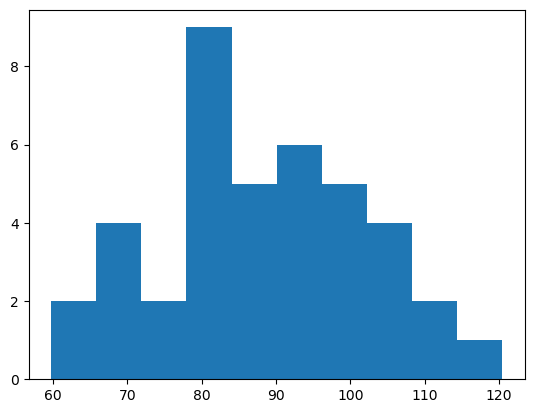

In [30]:
plt.hist(office1_dist)
plt.show()

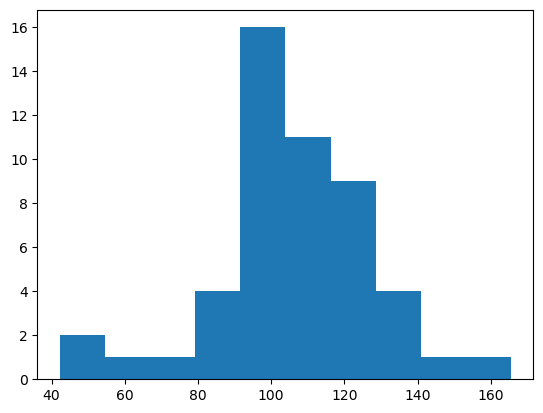

In [31]:
plt.hist(office2_dist)
plt.show()

In [94]:
office_1_mean = 90
office_1_std = 15
office_2_mean = 100
office_2_std = 20

In [109]:
t_stat, p_val = stats.ttest_ind_from_stats(mean1=office_1_mean,
                           std1=office_1_std, 
                           nobs1=40,
                          mean2=office_2_mean,
                          std2=office_2_std,
                          nobs2=50,
                          equal_var=True)

In [110]:
α = 0.05

In [113]:
#two tailed test means divide by 2
if p_val < α:
    print('we can reject the null hypothesis, and suggest that there is difference in mean sale time between offices')
else:
    print('we cannot reject the null hypothesis')

we can reject the null hypothesis, and suggest that there is difference in mean sale time between offices


In [101]:
#levene test:
#H0= there is equal varience between the two offices
#Ha= there is inequal variance between the two office

In [102]:
stats.levene(office1_dist,office2_dist)

LeveneResult(statistic=7.949346230559512, pvalue=0.005942193032647159)

In [103]:
t_stat,p_val = stats.ttest_ind(office1_dist,office2_dist,equal_var = False)

In [104]:
p_val

6.588381960497214e-05

In [105]:
p_val < 0.05

True

In [ ]:
## answer: there is a measurable difference

In [42]:
#Load the mpg dataset and use it to answer the following questions:
mpg = data('mpg')


In [69]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   manufacturer     234 non-null    object 
 1   model            234 non-null    object 
 2   displ            234 non-null    float64
 3   year             234 non-null    int64  
 4   cyl              234 non-null    int64  
 5   trans            234 non-null    object 
 6   drv              234 non-null    object 
 7   cty              234 non-null    int64  
 8   hwy              234 non-null    int64  
 9   fl               234 non-null    object 
 10  class            234 non-null    object 
 11  fuel_efficiency  234 non-null    float64
dtypes: float64(2), int64(4), object(6)
memory usage: 23.8+ KB


In [63]:
mpg['fuel_efficiency'] = (mpg['cty'] + mpg['hwy']) /2

In [114]:
mpg['fe'] = stats.hmean((mpg['hwy'], mpg['cty']))

In [64]:
mpg.fuel_efficiency.nunique()

40

In [65]:
#Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
#two sample one tail
fe2008 = mpg[mpg.year != 1999].fuel_efficiency
fe1999 = mpg[mpg.year == 1999].fuel_efficiency
stats.levene(fe2008,fe1999)

LeveneResult(statistic=0.033228136671080453, pvalue=0.855517569468803)

H$_0$:#there is no difference

H$_a$: there is a difference in fuel efficiency

(array([ 7.,  5., 32.,  4., 19., 22., 15.,  8.,  2.,  3.]),
 array([10.5, 12.7, 14.9, 17.1, 19.3, 21.5, 23.7, 25.9, 28.1, 30.3, 32.5]),
 <BarContainer object of 10 artists>)

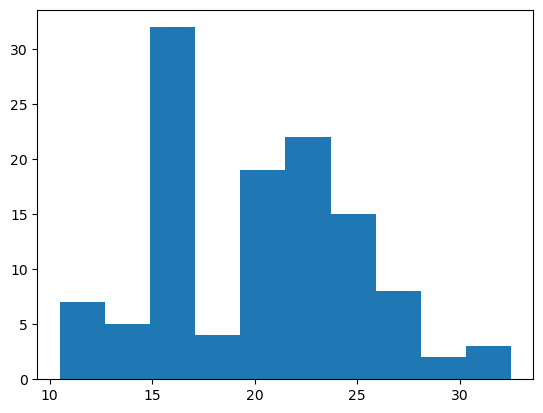

In [115]:
plt.hist(fe2008)

(array([32., 13., 12., 38., 12.,  5.,  2.,  0.,  1.,  2.]),
 array([13.  , 15.65, 18.3 , 20.95, 23.6 , 26.25, 28.9 , 31.55, 34.2 ,
        36.85, 39.5 ]),
 <BarContainer object of 10 artists>)

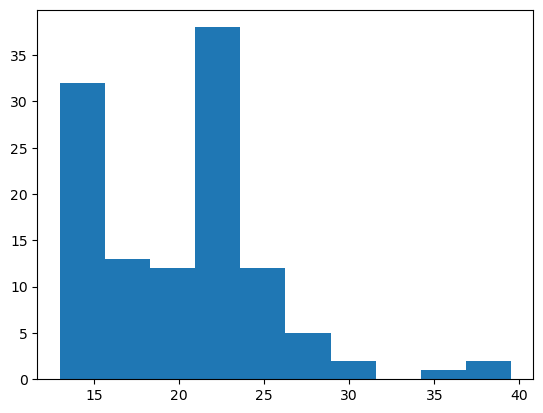

In [116]:
plt.hist(fe1999)

In [121]:
#pvalue over 0.05 cannot reject null equal_var=True
stats.levene(fe2008,fe1999)

LeveneResult(statistic=0.033228136671080453, pvalue=0.855517569468803)

In [118]:
#1999 and 2008 are exclusive categories so ttest ind

In [122]:
t_stat,p_val = stats.ttest_ind(fe2008,fe1999,equal_var=True)

In [123]:
p_val < α

False

In [124]:
#we fail to reject the null hypothesis, which means
#that we cannot with certainty say there is a difference
#there is no difference in fuel-efficiency

Are compact cars more fuel-efficient than the average car?

H$_0$:compact cars have lower or equal average fuel efficiency compared to all cars

H$_a$: compact cars have a greater than average fuel efficiency compared to all cars

In [125]:
#Are compact cars more fuel-efficient than the average car?
#1sample one tail ttest
mpg['class'].value_counts()

suv           62
compact       47
midsize       41
subcompact    35
pickup        33
minivan       11
2seater        5
Name: class, dtype: int64

In [71]:
compacts = mpg[mpg['class'] == 'compact']

In [75]:
t_stat,p_val= stats.ttest_1samp(compacts.fuel_efficiency,mpg.fuel_efficiency.mean())

In [126]:
p_val

0.8263744040323578

In [128]:
if ((p_val /2) < α) and (t_stat > 0):
    print('we can reject the null hypothesis')
    print('there is evidence that the alternative posited is valid')
else:
    print('we fail to reject the null hypothesis')

we fail to reject the null hypothesis


In [ ]:
## compact cars are more effecient than other cars

In [ ]:
#Do manual cars get better gas mileage than automatic cars?
#2 samples one tail

In [81]:
mpg['auto_transmission'] = mpg.trans.str.startswith('auto')
#use mask to get auto.hwy
auto_fe= mpg[mpg['auto_transmission']== True].fuel_efficiency
#us mask to get manual trans.hwy
manual_fe= mpg[mpg['auto_transmission']!= True].fuel_efficiency

In [ ]:
#group a manual cars
#group b auto cars
#independent sub-groups:
#ttest_ind

In [ ]:
#levene test
#h0: equal var
#ha: inequal var

In [130]:
__, levene_p = stats.levene(auto_fe,manual_fe)

In [131]:
levene_p < 0.05

False

In [135]:
#we cannot reject null, equal_var= True
t_stat,p_val = stats.ttest_ind(manual_fe,auto_fe,equal_var=True)

In [136]:
p_val < 0.05

True

In [137]:
#p_val is less than alpha
#tstat?

In [138]:
t_stat

4.593437735750014

In [87]:
#manual cars get better gas mileage than automatics